PROCESS

In [3]:
# Install needed packages
install.packages("tidyverse", dependencies = TRUE)
install.packages("lubridate")
install.packages("geosphere")


Warning message in install.packages("tidyverse", dependencies = TRUE):
“installation of package ‘tidyverse’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
# Load the packages
library(readr)
library(dplyr)
library(purrr)
library(tidyr)
library(lubridate)
library(ggplot2)

In [6]:
# Set the working directory to the location of the downloaded data
setwd("/home/ladipo/Desktop/Data Analytic/DataSets/Cyclic_Data")

In [7]:
# List all CSV files in the working directory set above
files <- list.files(pattern = "*.csv")

In [8]:
# Read each CSV file and store them in a list for efficient CSV reading
data_list <- lapply(files, read_csv)

Rows: 426590 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 144873 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 223164 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [9]:
# Combine the list of data frames into a single data frame using bind_rows
combined_data <- bind_rows(data_list)

In [10]:
head(combined_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member


In [ ]:
# View the combined data
View(combined_data)

In [11]:
# Structure of the data
str(combined_data)

spc_tbl_ [5,750,177 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5750177] "8FE8F7D9C10E88C7" "34E4ED3ADF1D821B" "5296BF07A2F77CB5" "40759916B76D5D52" ...
 $ rideable_type     : chr [1:5750177] "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : POSIXct[1:5750177], format: "2023-04-02 08:37:28" "2023-04-19 11:29:02" ...
 $ ended_at          : POSIXct[1:5750177], format: "2023-04-02 08:41:37" "2023-04-19 11:52:12" ...
 $ start_station_name: chr [1:5750177] NA NA NA NA ...
 $ start_station_id  : chr [1:5750177] NA NA NA NA ...
 $ end_station_name  : chr [1:5750177] NA NA NA NA ...
 $ end_station_id    : chr [1:5750177] NA NA NA NA ...
 $ start_lat         : num [1:5750177] 41.8 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:5750177] -87.6 -87.7 -87.7 -87.7 -87.7 ...
 $ end_lat           : num [1:5750177] 41.8 41.9 41.9 41.9 41.9 ...
 $ end_lng           : num [1:5750177] -87.6 -87.7 -87.7 -87.7 -87.6 ...
 $ membe

In [12]:
# Convert to datetime using lubridate
combined_data$started_at <- ymd_hms(combined_data$started_at)
combined_data$ended_at <- ymd_hms(combined_data$ended_at)

In [13]:
# Calculate the difference
combined_data$time_diff <- as.duration(interval(combined_data$started_at, combined_data$ended_at))

In [14]:
# Convert the duration to a more readable format, if necessary
combined_data$ride_length <- as.numeric(combined_data$time_diff, units = "mins")

In [15]:
# Extract the day of the week as a number (1 = Sunday, 2 = Monday, ...)
combined_data$day_of_week_num <- wday(combined_data$started_at)

In [16]:
# Extract the day of the week as a label (Sunday, Monday, ...)
combined_data$day_of_week_label <- wday(combined_data$started_at, label = TRUE)

In [32]:
# Extract the month number and name
combined_data$month_number <- month(combined_data$started_at)
combined_data$month_name <- month(combined_data$started_at, label = TRUE, abbr = FALSE)

In [33]:
library(geosphere)

# Calculate distance in meters
combined_data$distance <- distHaversine(p1 = cbind(combined_data$start_lng, combined_data$start_lat), 
                              p2 = cbind(combined_data$end_lng, combined_data$end_lat))

head(combined_data)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,ride_length,day_of_week_num,day_of_week_label,distance,month_number,month_name
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<Duration>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<ord>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member,249s (~4.15 minutes),4.150000,1,Sun,1113.195,4,April
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member,1390s (~23.17 minutes),23.166667,4,Wed,7126.708,4,April
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member,120s (~2 minutes),2.000000,4,Wed,0.000,4,April
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member,219s (~3.65 minutes),3.650000,4,Wed,1113.195,4,April
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member,290s (~4.83 minutes),4.833333,4,Wed,1656.868,4,April
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member,244s (~4.07 minutes),4.066667,4,Wed,1995.992,4,April


In [34]:
# Filter out rows with NA in the 'started_at' or 'ended_at' columns
combined_data_clean <- combined_data %>%
  filter(!is.na(started_at) & !is.na(ended_at))

head(combined_data_clean)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,ride_length,day_of_week_num,day_of_week_label,distance,month_number,month_name
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<Duration>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<ord>
8FE8F7D9C10E88C7,electric_bike,2023-04-02 08:37:28,2023-04-02 08:41:37,NA,NA,NA,NA,41.80,-87.60,41.79,-87.60,member,249s (~4.15 minutes),4.150000,1,Sun,1113.195,4,April
34E4ED3ADF1D821B,electric_bike,2023-04-19 11:29:02,2023-04-19 11:52:12,NA,NA,NA,NA,41.87,-87.65,41.93,-87.68,member,1390s (~23.17 minutes),23.166667,4,Wed,7126.708,4,April
5296BF07A2F77CB5,electric_bike,2023-04-19 08:41:22,2023-04-19 08:43:22,NA,NA,NA,NA,41.93,-87.66,41.93,-87.66,member,120s (~2 minutes),2.000000,4,Wed,0.000,4,April
40759916B76D5D52,electric_bike,2023-04-19 13:31:30,2023-04-19 13:35:09,NA,NA,NA,NA,41.92,-87.65,41.91,-87.65,member,219s (~3.65 minutes),3.650000,4,Wed,1113.195,4,April
77A96F460101AC63,electric_bike,2023-04-19 12:05:36,2023-04-19 12:10:26,NA,NA,NA,NA,41.91,-87.65,41.91,-87.63,member,290s (~4.83 minutes),4.833333,4,Wed,1656.868,4,April
8D6A2328E19DC168,electric_bike,2023-04-19 12:17:34,2023-04-19 12:21:38,NA,NA,NA,NA,41.91,-87.63,41.92,-87.65,member,244s (~4.07 minutes),4.066667,4,Wed,1995.992,4,April


In [35]:
# Export dataframe to CSV file on my computer
write.csv(combined_data_clean, file = "/home/ladipo/Desktop/Data Analytic/Coursera Training/combined_data_clean_bike_vscode.csv", row.names = FALSE)

ANALYSIS

In [61]:
# Combine grouping and summarizing of members and casual day of the week label
combined_data_clean_month <- combined_data_clean %>%
  group_by(month_name) %>%
  summarize(
    average_ride_length = mean(ride_length),
    count = n()/10000
  )

View(combined_data_clean_month)

month_name,average_ride_length,count
<ord>,<dbl>,<dbl>
January,15.05738,14.4873
February,15.50820,22.3164
March,15.52248,30.1687
April,17.21068,42.6590
May,19.03356,60.4827
June,19.98394,71.9618
July,21.73797,76.7650
August,22.42845,77.1693
September,17.87153,66.6371


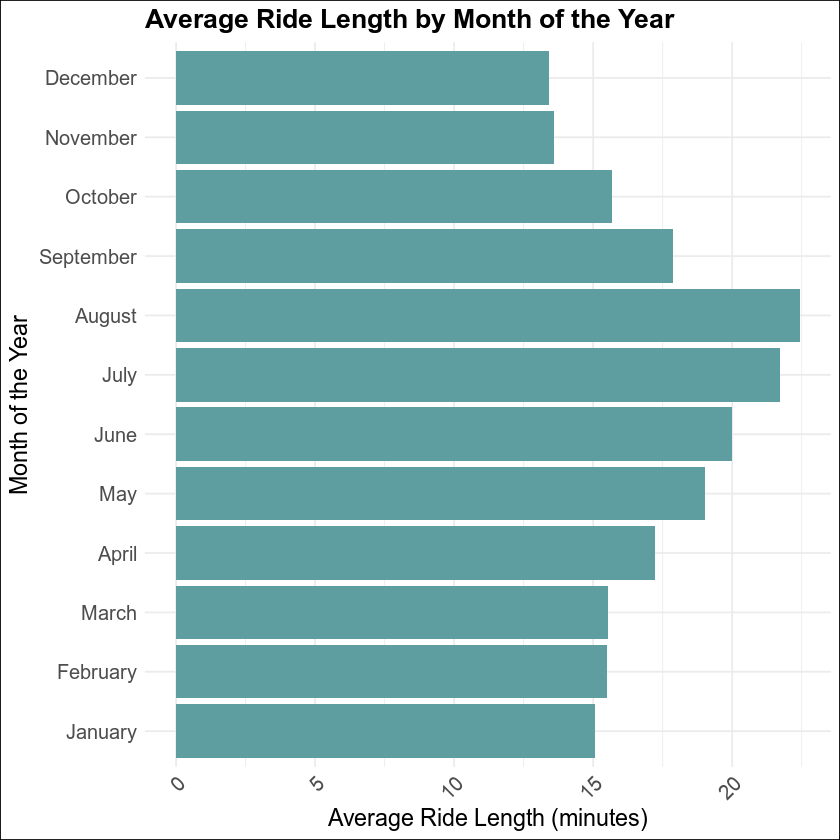

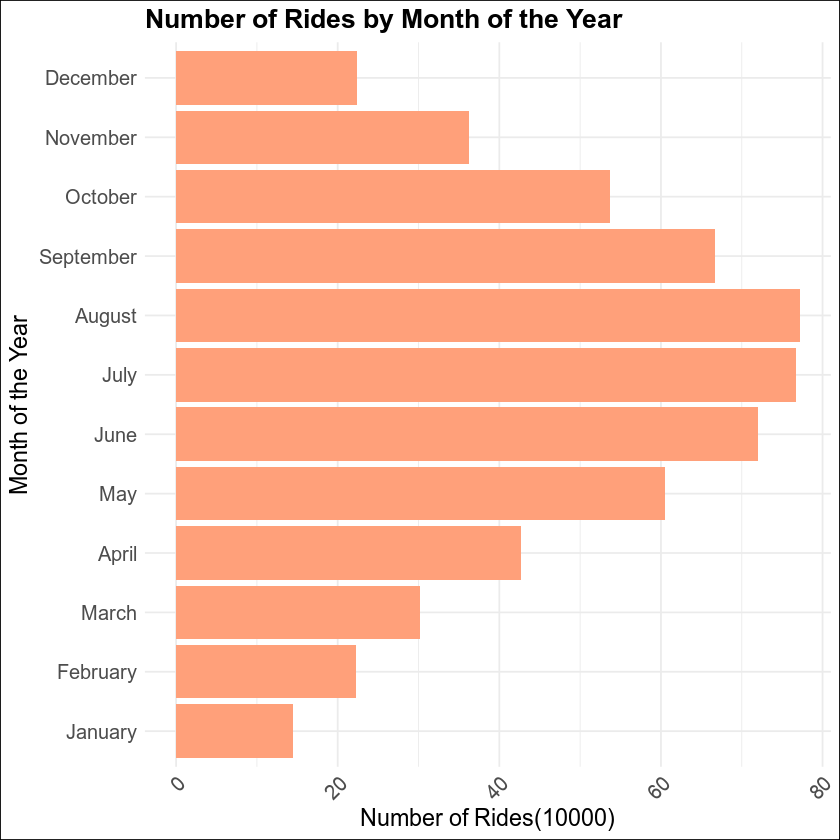

In [64]:
# Plot the average ride length with custom colors and white background
p1 <- ggplot(combined_data_clean_month, aes(x = month_name, y = average_ride_length)) +
  geom_bar(stat = "identity", fill = "#5F9EA0") +  # Turquoise
  labs(title = "Average Ride Length by Month of the Year",
       x = "Month of the Year",
       y = "Average Ride Length (minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) +
  coord_flip()

# Plot the number of rides with custom colors and white background
p2 <- ggplot(combined_data_clean_month, aes(x = month_name, y = count)) +
  geom_bar(stat = "identity", fill = "#FFA07A") +  # Light Salmon
  labs(title = "Number of Rides by Month of the Year",
       x = "Month of the Year",
       y = "Number of Rides(10000)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) +
  coord_flip()

# Print both plots
print(p1)
print(p2)

In [65]:
# Combine grouping and summarizing of members and casual day of the week label
combined_data_clean_day <- combined_data_clean %>%
  group_by(day_of_week_label) %>%
  summarize(
    mean_ride_length = mean(ride_length),
    count = n()/10000
  )

View(combined_data_clean_day)

day_of_week_label,mean_ride_length,count
<ord>,<dbl>,<dbl>
Sun,22.63675,74.3856
Mon,17.25109,73.6821
Tue,16.35452,81.5719
Wed,15.85377,83.7387
Thu,16.18532,87.4825
Fri,18.14072,84.2731
Sat,22.47758,89.8838


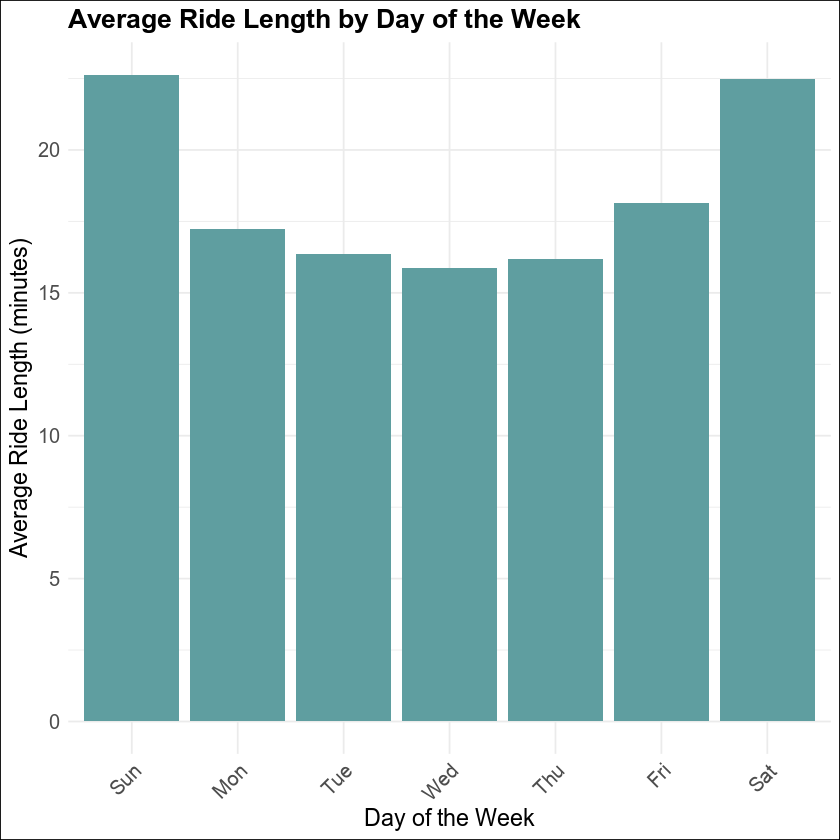

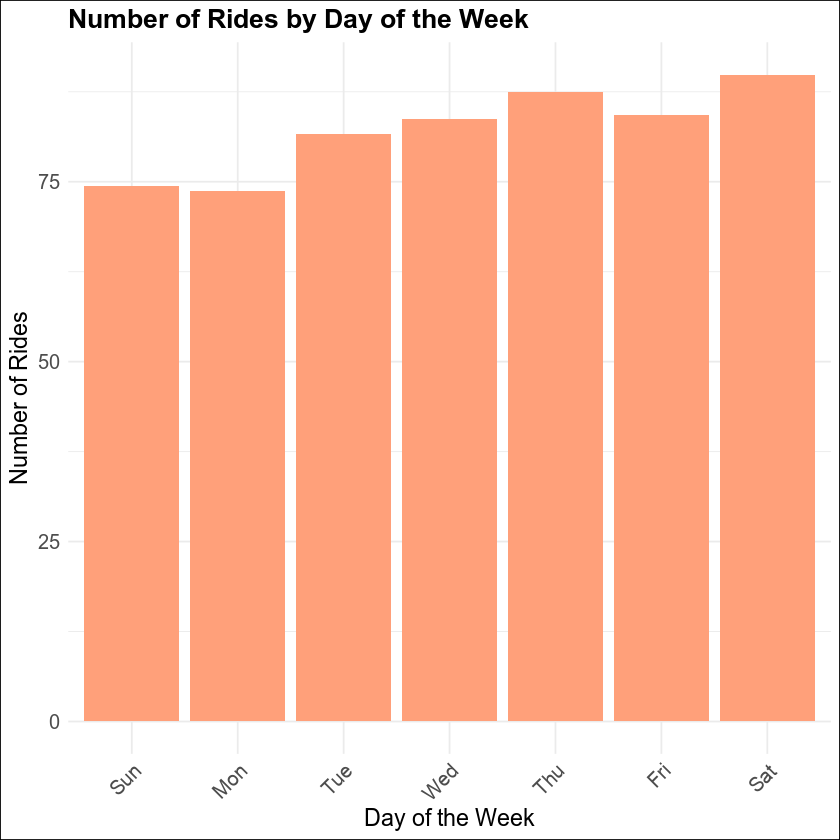

In [67]:
# Load the necessary package
library(ggplot2)

# Plot the average ride length with custom colors and white background
p1 <- ggplot(combined_data_clean_day, aes(x = day_of_week_label, y = mean_ride_length)) +
  geom_bar(stat = "identity", fill = "#5F9EA0") +  # Turquoise
  labs(title = "Average Ride Length by Day of the Week",
       x = "Day of the Week",
       y = "Average Ride Length (minutes)") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 

# Plot the number of rides with custom colors and white background
p2 <- ggplot(combined_data_clean_day, aes(x = day_of_week_label, y = count)) +
  geom_bar(stat = "identity", fill = "#FFA07A") +  # Light Salmon
  labs(title = "Number of Rides by Day of the Week",
       x = "Day of the Week",
       y = "Number of Rides") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
    ) 

# Print both plots
print(p1)
print(p2)


In [71]:
# Group by 'day_of_week_label' and count 'member' and 'casual'

# Calculate counts and percentages
member_casual <- combined_data_clean %>%
  group_by(day_of_week_label) %>%
  summarize(
    total_member = sum(member_casual == "member"),
    total_casual = sum(member_casual == "casual"),
    percent_member = (total_member / sum(total_member + total_casual)) * 100,
    percent_casual = (total_casual / sum(total_member + total_casual)) * 100
  )
View(member_casual)

day_of_week_label,total_member,total_casual,percent_member,percent_casual
<ord>,<int>,<int>,<dbl>,<dbl>
Sun,407528,336328,54.78587,45.21413
Mon,500519,236302,67.92952,32.07048
Tue,571565,244154,70.06886,29.93114
Wed,590031,247356,70.46097,29.53903
Thu,601874,272951,68.79936,31.20064
Fri,530154,312577,62.90904,37.09096
Sat,480379,418459,53.44445,46.55555


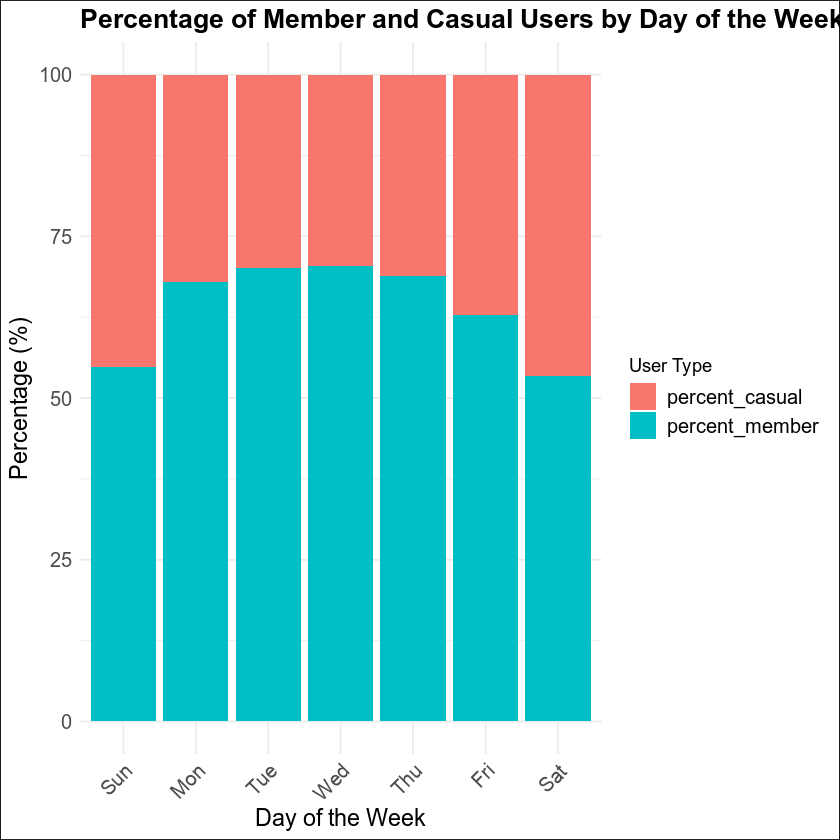

In [72]:
# Reshape data for plotting
member_casual_long <- member_casual %>%
  pivot_longer(cols = c(percent_member, percent_casual),
               names_to = "type",
               values_to = "percentage")

# Plotting the stacked bar chart
ggplot(member_casual_long, aes(x = day_of_week_label, y = percentage, fill = type)) +
  geom_bar(stat = "identity") +
  labs(title = "Percentage of Member and Casual Users by Day of the Week",
       x = "Day of the Week",
       y = "Percentage (%)",
       fill = "User Type") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    axis.text.x = element_text(size = 12, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 12),
    axis.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.background = element_rect(fill = "white")
  )

In [53]:
# Group by 'rideable_type' and count 'member' and 'casual'
rideable_type_number <- combined_data_clean %>%
  dplyr::group_by(rideable_type) %>%
  dplyr::summarize(
    member = sum(member_casual == "member"),
    casual = sum(member_casual == "casual")
  )

View(rideable_type_number)

rideable_type,member,casual
<chr>,<int>,<int>
classic_bike,1868311,905858
docked_bike,0,71334
electric_bike,1813739,1090935
